# Importing Libraries and reading Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("darkgrid")
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler,PolynomialFeatures
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("car_data.csv")

In [3]:
df #Note MSRP ==> Manufacturer's Suggested Retail Price and it is our target

,index,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,0,Aston Martin,DBX707,2024,Base,"$242,000",NaN,"$242,000",Large,SUV,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$33,653","$35,800",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$35,533","$37,800",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$38,917","$41,400",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$37,037","$39,400",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,6410,Nissan,Z,2023,Performance,"$50,990",NaN,"$50,990",Compact,Coupe,V6,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,28 mpg
1606,6411,Nissan,Z,2023,Proto Spec,"$53,990",NaN,"$53,990",Compact,Coupe,V6,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,28 mpg
1607,6412,Nissan,Z,2023,Proto Spec,"$53,990",NaN,"$53,990",Compact,Coupe,V6,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,24 mpg
1608,6413,Nissan,Z,2023,Sport,"$40,990",NaN,"$40,990",Compact,Coupe,V6,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,24 mpg


In [4]:
#Checking for Dubplicated values
df.duplicated().sum()

np.int64(0)

# Chechking NaN Values using missingo Library

Invoice Price has 552 missing values
Cylinders has 165 missing values
Torque has 27 missing values
Highway Fuel Economy has 424 missing values


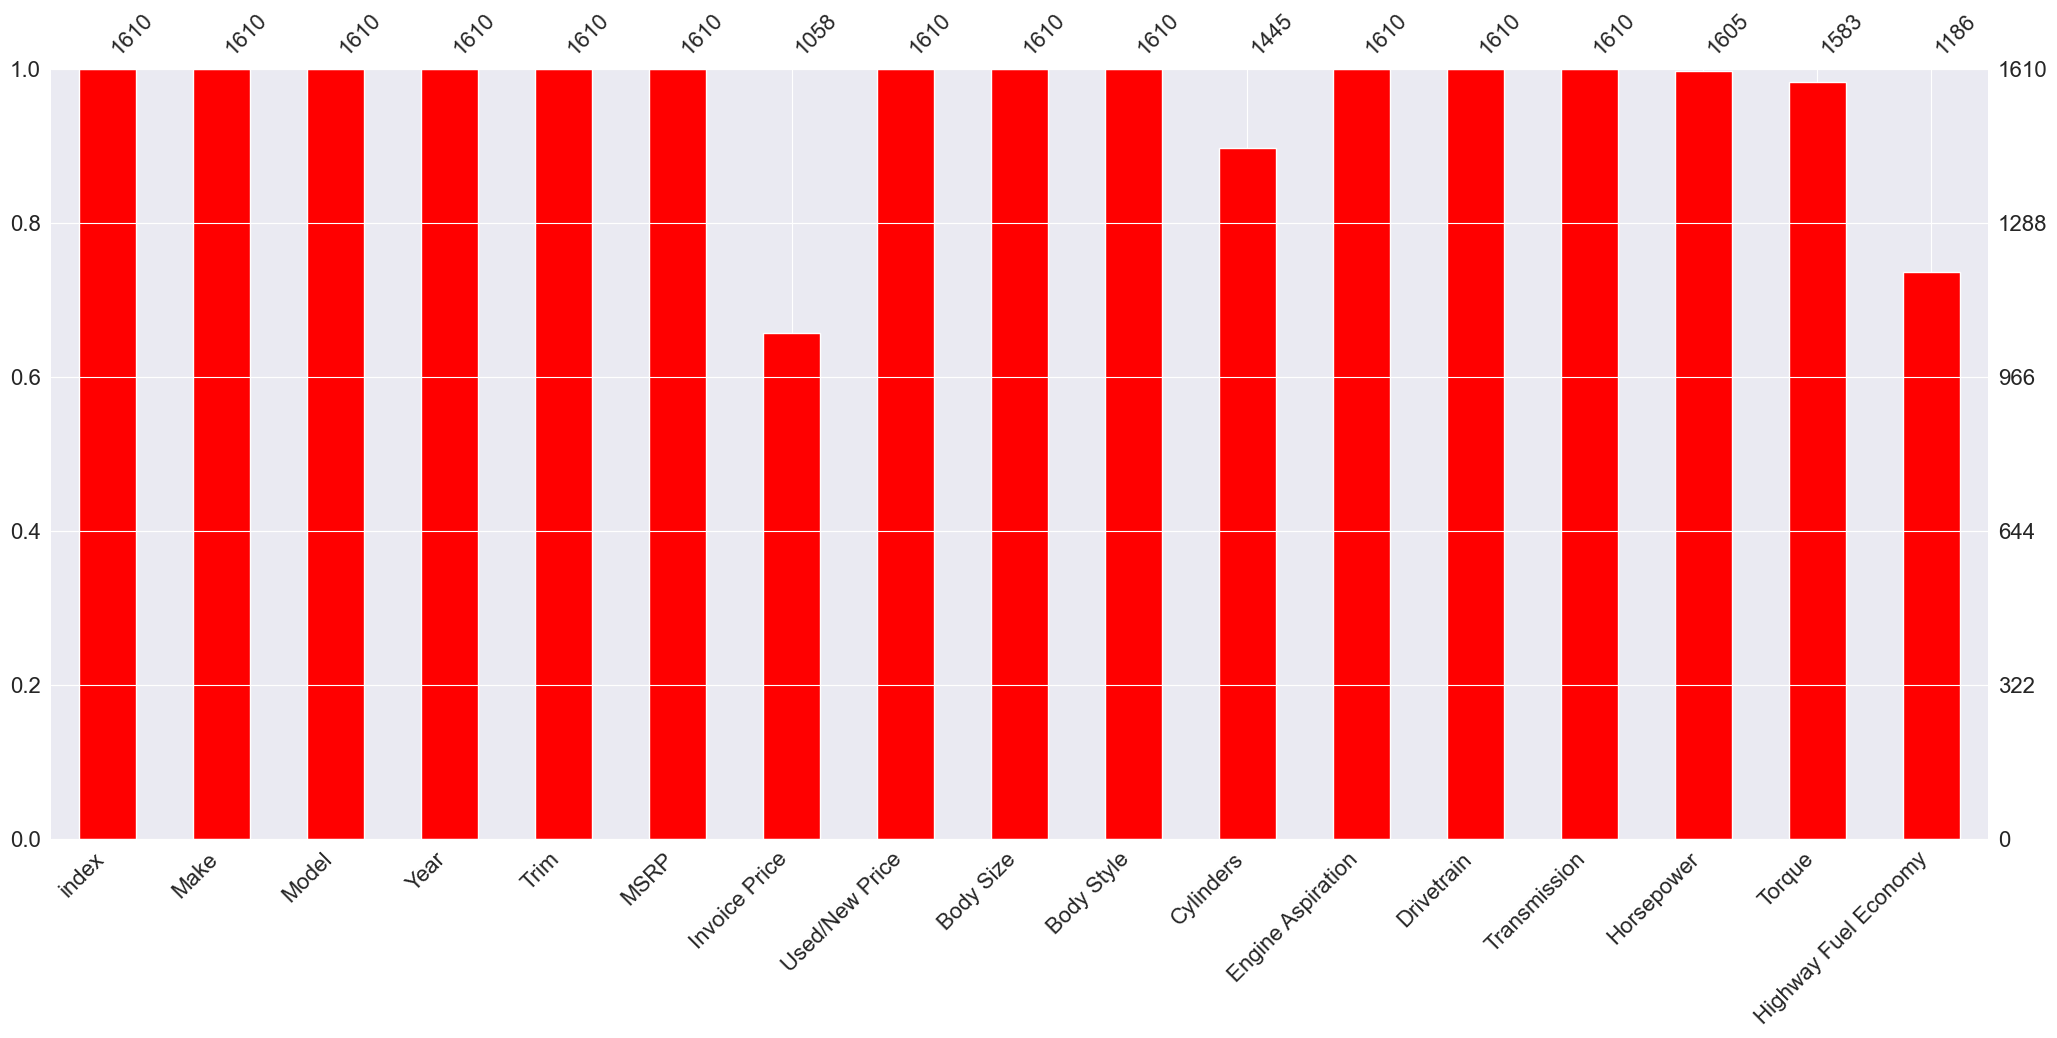

In [5]:
msno.bar(df,color="red")
for col in df.columns:
    null_count = df[col].isnull().sum()
    if null_count > 16:
        print(f"{col} has {null_count} missing values")

In [6]:
## Checking type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 1610 non-null   int64 
 1   Make                  1610 non-null   object
 2   Model                 1610 non-null   object
 3   Year                  1610 non-null   int64 
 4   Trim                  1610 non-null   object
 5   MSRP                  1610 non-null   object
 6   Invoice Price         1058 non-null   object
 7   Used/New Price        1610 non-null   object
 8   Body Size             1610 non-null   object
 9   Body Style            1610 non-null   object
 10  Cylinders             1445 non-null   object
 11  Engine Aspiration     1610 non-null   object
 12  Drivetrain            1610 non-null   object
 13  Transmission          1610 non-null   object
 14  Horsepower            1605 non-null   object
 15  Torque                1583 non-null   

In [7]:
df["Used/New Price"] = df["Used/New Price"].str.split("$").str[1].str.replace(",","").astype(float)
df["MSRP"] = df["MSRP"].str.split("$").str[1].str.replace(",","").astype(float)

In [8]:
df["Used/New Price"]

0       242000.0
1        35800.0
2        37800.0
3        41400.0
4        39400.0
          ...   
1605     50990.0
1606     53990.0
1607     53990.0
1608     40990.0
1609     40990.0
Name: Used/New Price, Length: 1610, dtype: float64

In [9]:
#getting more info about Data
for col in df:
    uni_value = df[col].unique()
    nr_values = df[col].nunique(dropna=False)
    if nr_values <= 12:
        print(f"number of unique values for {col} col is {nr_values} ==>{uni_value}")
        print("_"*60)
    else:
        print(f"the number of unique values for {col} col is {nr_values}")
        print("_"*60)

the number of unique values for index col is 1610
____________________________________________________________
number of unique values for Make col is 7 ==>['Aston Martin' 'Audi' 'BMW' 'Bentley' 'Ford' 'Mercedes-Benz' 'Nissan']
____________________________________________________________
the number of unique values for Model col is 150
____________________________________________________________
number of unique values for Year col is 2 ==>[2024 2023]
____________________________________________________________
the number of unique values for Trim col is 373
____________________________________________________________
the number of unique values for MSRP col is 1317
____________________________________________________________
the number of unique values for Invoice Price col is 944
____________________________________________________________
the number of unique values for Used/New Price col is 1317
____________________________________________________________
number of unique values fo

# Dealing with Nan Values

In [10]:
df["index"].nunique()# we can drop this column as we have no need for it 

1610

In [11]:
#dropping Col
df.drop(columns=["index","Invoice Price","Cylinders","Highway Fuel Economy"],axis = 1 , inplace = True )

In [12]:
df

,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque
0,Aston Martin,DBX707,2024,Base,242000.0,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm
1,Audi,A3,2024,Premium w/40 TFSI,35800.0,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm
2,Audi,A3,2024,Premium w/40 TFSI,37800.0,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm
3,Audi,A3,2024,Premium Plus w/40 TFSI,41400.0,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm
4,Audi,A3,2024,Premium Plus w/40 TFSI,39400.0,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Nissan,Z,2023,Performance,50990.0,50990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm
1606,Nissan,Z,2023,Proto Spec,53990.0,53990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm
1607,Nissan,Z,2023,Proto Spec,53990.0,53990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm
1608,Nissan,Z,2023,Sport,40990.0,40990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm


In [13]:
# Filling Horsepower with the Mean Value

df["HorsePower_HP"]= df["Horsepower"].str.split(" ").str[0].astype(float)

In [14]:
df[df["Horsepower"].isnull()] # we will get mean of ford car and fill them with it

,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,HorsePower_HP
371,Ford,F-150 Lightning,2024,Flash,67995.0,67995.0,Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
372,Ford,F-150 Lightning,2024,Lariat,76995.0,76995.0,Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
373,Ford,F-150 Lightning,2024,Platinum,84995.0,84995.0,Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
374,Ford,F-150 Lightning,2024,Pro,54995.0,54995.0,Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
375,Ford,F-150 Lightning,2024,XLT,62995.0,62995.0,Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN


In [15]:
mean_value = df["HorsePower_HP"][df["Make"]=="Ford"].mean()

In [16]:
mean_value

np.float64(333.2254428341385)

In [17]:
df["Horsepower"]=df["Horsepower"].fillna(mean_value)
df["HorsePower_HP"]=df["HorsePower_HP"].fillna(mean_value)

doing same for Torque 

In [18]:
df["Torque_value"]= df["Torque"].str.split(" ").str[0].astype(float)

In [19]:
def fill_missing_torque_by_make(df):
    makes = df["Make"].unique()
    #Getting all Mean values for brands
    for make in makes:
        mean_torque = df.loc[df["Make"] == make, "Torque_value"].mean() 

  
        #if it is null then fill it with its make value
        df.loc[(df["Torque"].isnull()) & (df["Make"] == make), "Torque"] = mean_torque
        df.loc[(df["Torque_value"].isnull()) & (df["Make"] == make), "Torque_value"] = mean_torque

    return df


In [20]:
df = fill_missing_torque_by_make(df)

In [21]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Trim                 0
MSRP                 0
Used/New Price       0
Body Size            0
Body Style           0
Engine Aspiration    0
Drivetrain           0
Transmission         0
Horsepower           0
Torque               0
HorsePower_HP        0
Torque_value         0
dtype: int64

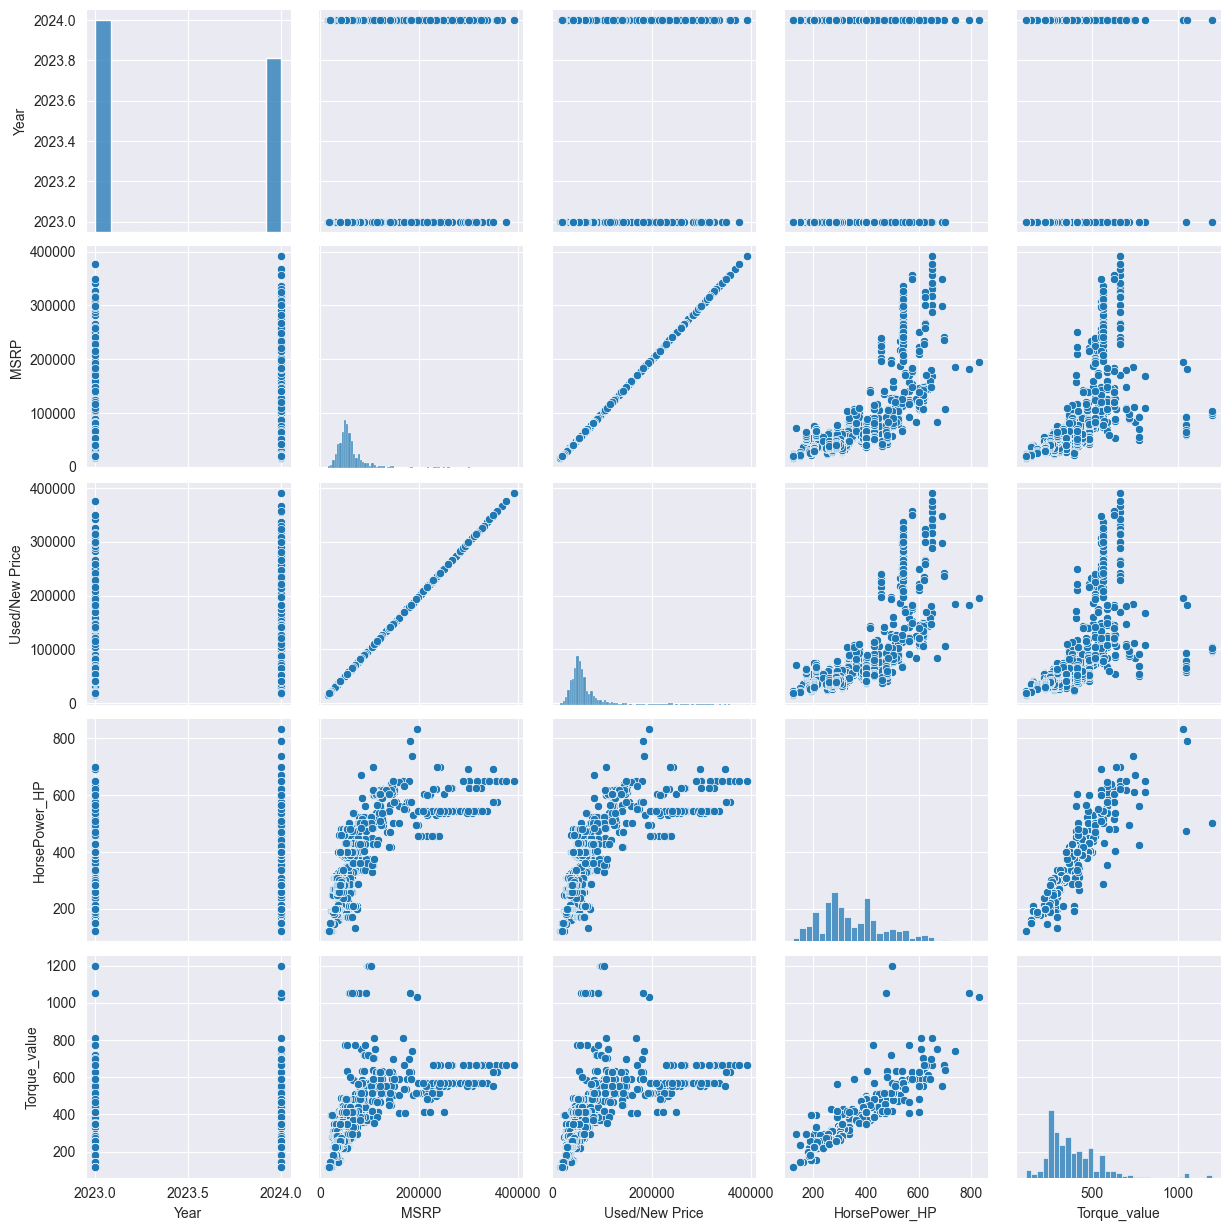

In [22]:
## Checking for realtion between our Features

Corr = sns.pairplot(df.select_dtypes("number"))

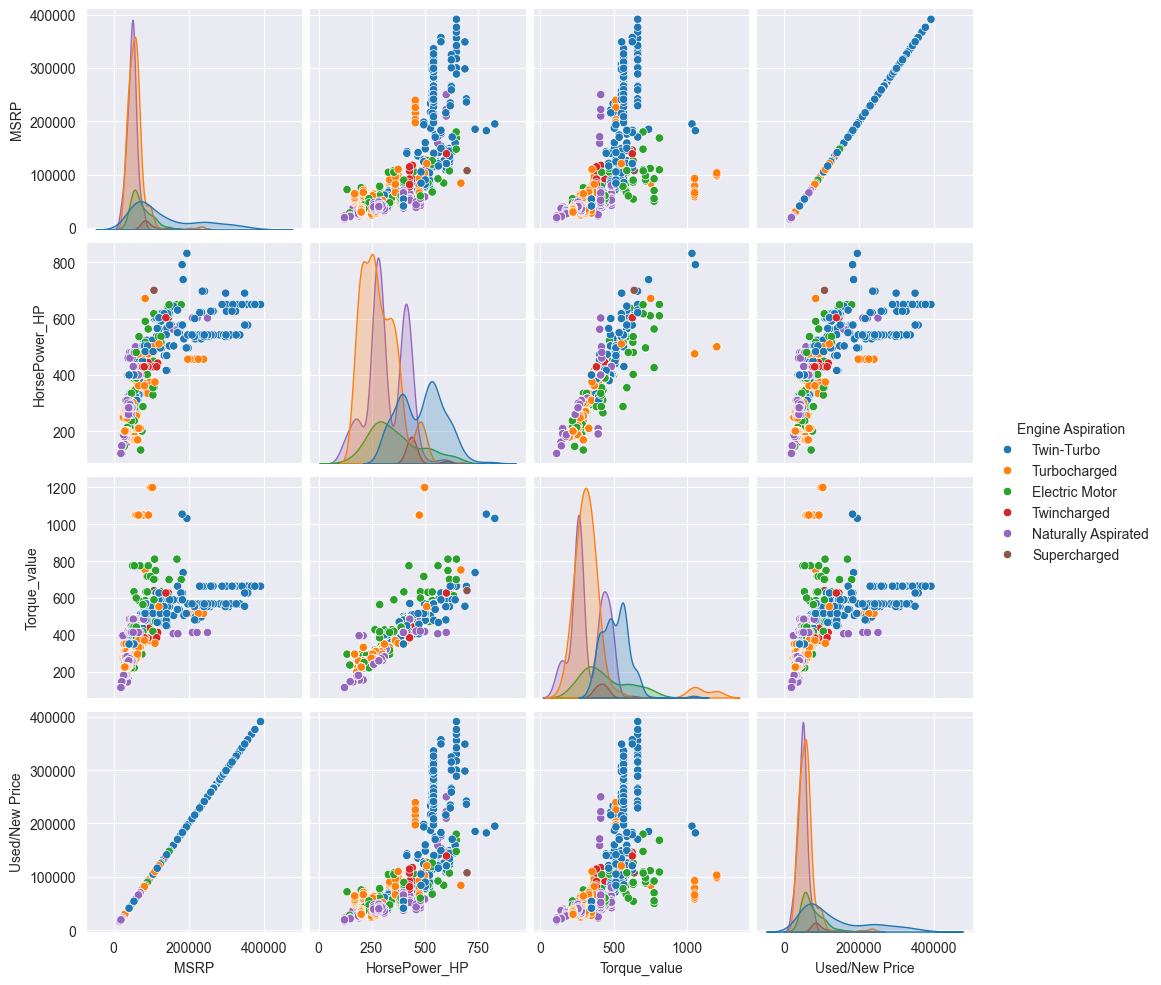

In [23]:
# depending on the engine type 
Corr1 = sns.pairplot(df[["MSRP","HorsePower_HP","Torque_value","Used/New Price","Engine Aspiration"]],hue ="Engine Aspiration")

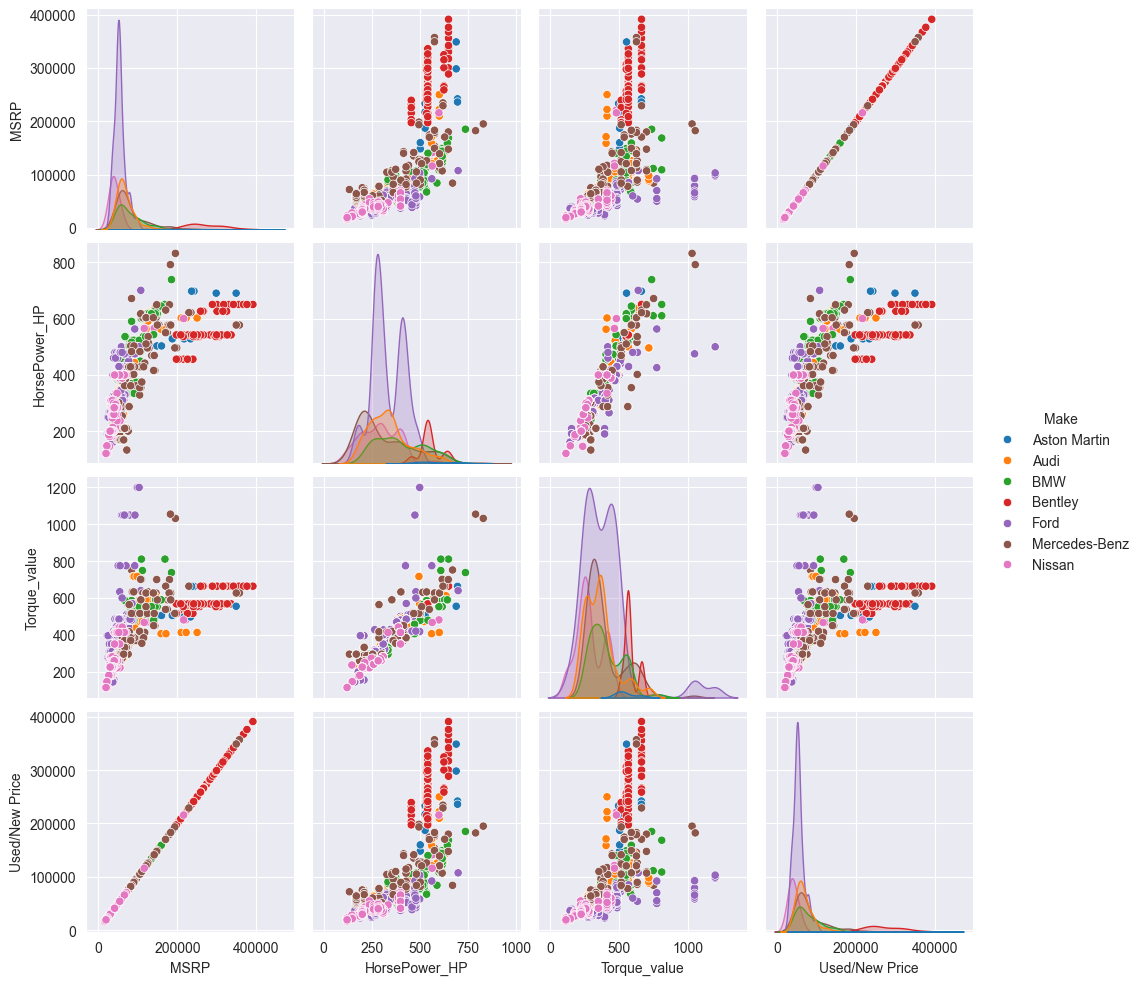

In [24]:
# depending on the Car brand 
Corr2= sns.pairplot(df[["MSRP","HorsePower_HP","Torque_value","Used/New Price","Make"]],hue ="Make")

Visualizing Categorical data

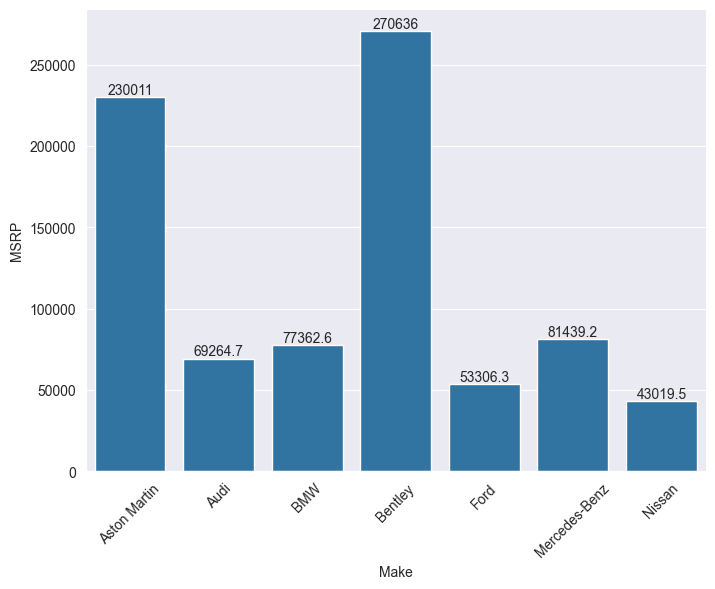

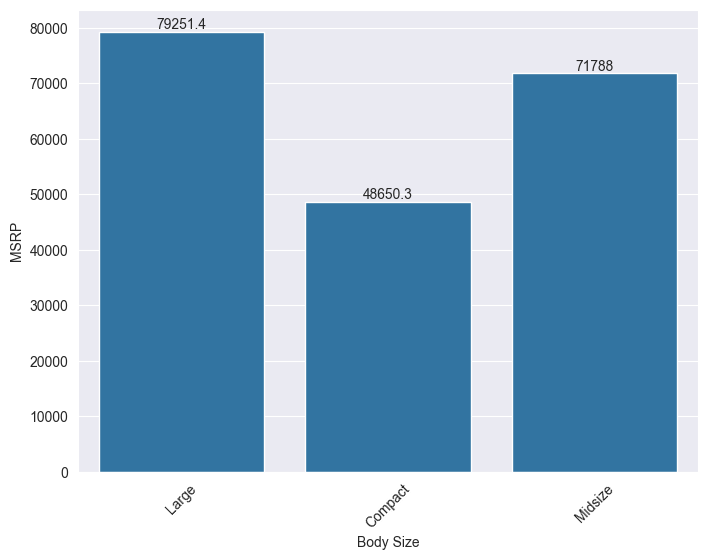

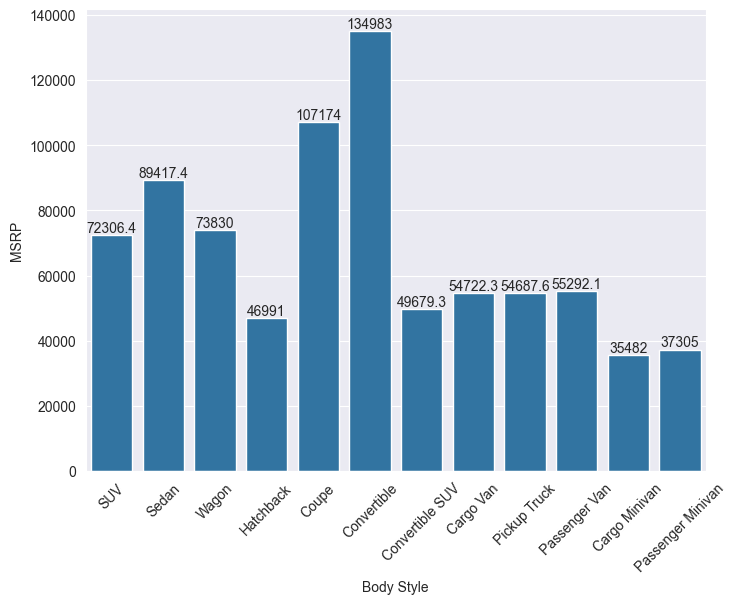

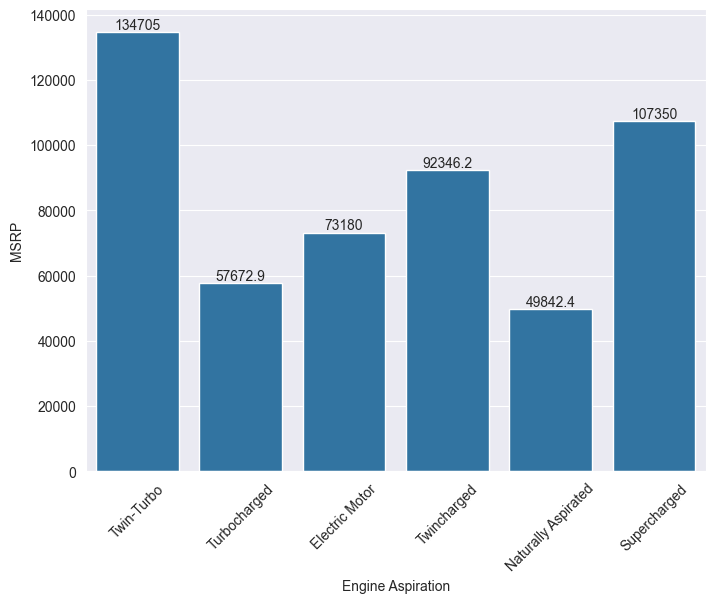

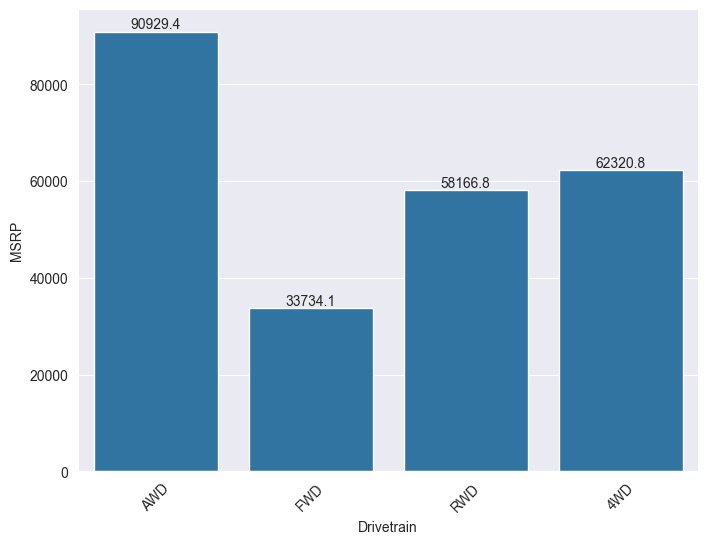

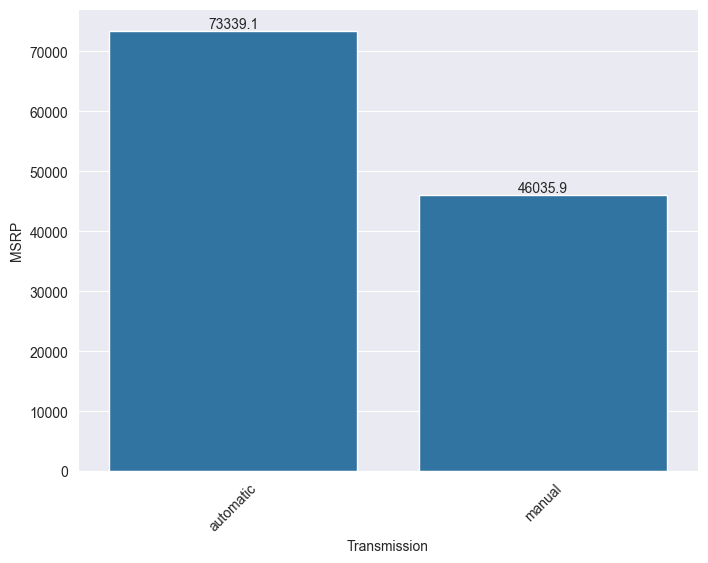

In [25]:
for c in df[["Make","Body Size","Body Style","Engine Aspiration","Drivetrain","Transmission"]]:
    plt.figure(figsize=(8, 6))
    ax= sns.barplot(x= c, y = "MSRP",data= df, errorbar=("ci",False))
    for con in ax.containers:
        ax.bar_label(con)
    plt.xticks(rotation=45)
    plt.show()

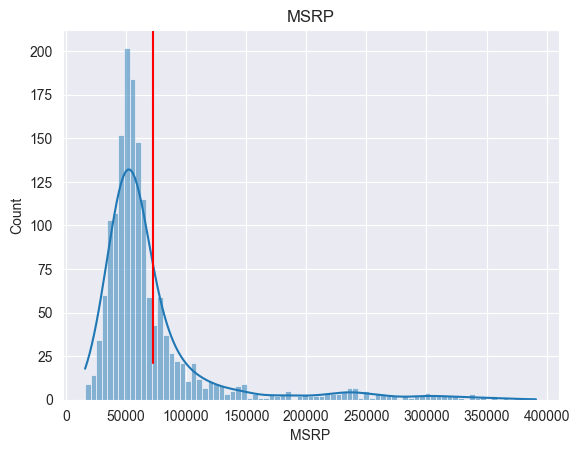

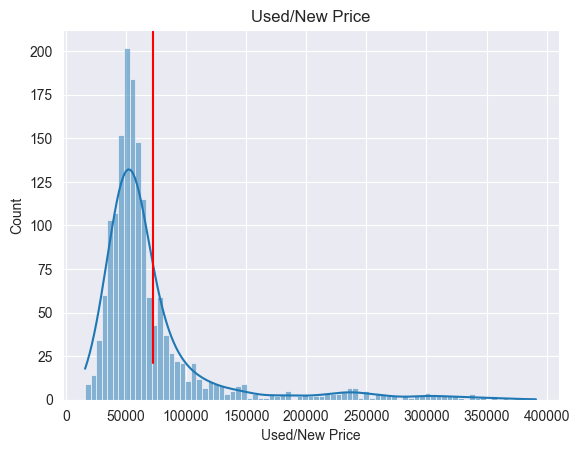

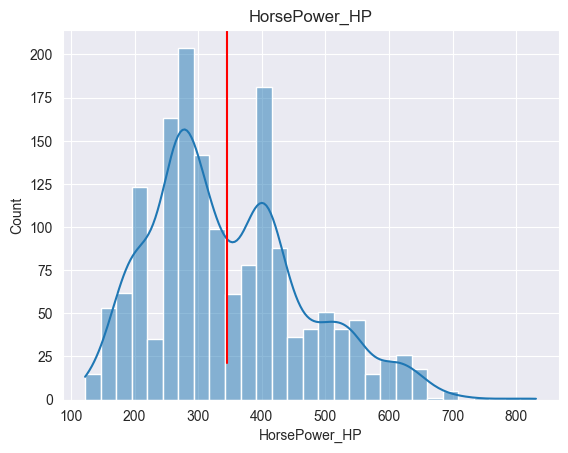

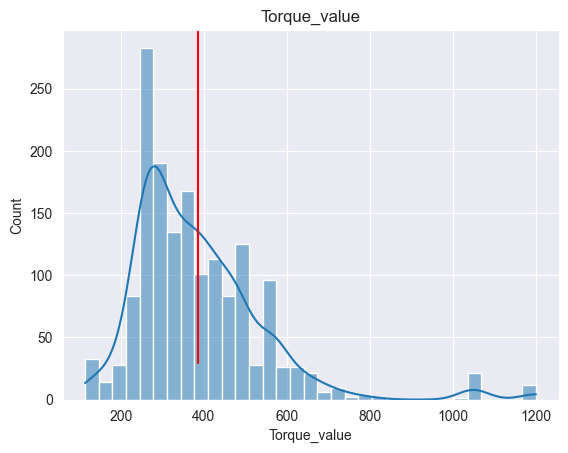

In [26]:
for x in df.select_dtypes("number").columns[1:]:
    sns.histplot(data= df, x = x ,kde = True)
    mean= df[x].mean()
    plt.axvline(mean,0.1,color="red")
    plt.title(x)
    plt.show()

# Preparing Data for ML Model

In [27]:
#dropping less important col 

DF = df.drop(columns=["Model","Year","Trim","Used/New Price","Torque","Horsepower"],axis=1)

In [28]:
DF

,Make,MSRP,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,HorsePower_HP,Torque_value
0,Aston Martin,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697.0,663.0
1,Audi,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
2,Audi,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
3,Audi,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
4,Audi,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
...,...,...,...,...,...,...,...,...,...
1605,Nissan,50990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400.0,350.0
1606,Nissan,53990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400.0,350.0
1607,Nissan,53990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400.0,350.0
1608,Nissan,40990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400.0,350.0


## Pipeline

In [29]:
from sklearn.feature_selection import SelectFromModel

In [30]:
df2=df.drop(columns=["Model","Year","Trim","Used/New Price","Torque","Horsepower"],axis=1)

In [31]:
cat_cols = ['Make', 'Body Size', 'Body Style', 'Engine Aspiration', 'Drivetrain', 'Transmission']
encoder = ColumnTransformer([
    ("Encoder", OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore'), cat_cols)
], remainder="passthrough")

In [32]:
x2 =df2.drop(columns="MSRP",axis =1)

In [33]:
y2= df2["MSRP"]

In [34]:
stepss=[]
stepss.append(("encoding", encoder))
stepss.append(("feature_selection", SelectFromModel(DecisionTreeRegressor(max_depth=10, random_state=15),max_features=25,threshold=0)))
stepss.append(("model", LinearRegression()))

In [35]:
Pipe2= Pipeline(steps=stepss)

In [36]:
score2 = cross_validate(Pipe2,x2,y2,cv=2,scoring="r2",return_train_score= True)

In [37]:
print(f"Test:{score2["test_score"].mean()}")
print(f"Train:{score2["train_score"].mean()}")

Test:0.8763424949516618
Train:0.9011103592031917


In [38]:
lm=Pipe2.fit(x2,y2)
with open ("Linear Model.pkl","wb") as f:
    pickle.dump(lm,f)

In [39]:
preds = Pipe2.predict(df).round(2)

In [40]:
df["Predicted"] = preds

In [41]:
df

,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,HorsePower_HP,Torque_value,Predicted
0,Aston Martin,DBX707,2024,Base,242000.0,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,697.0,663.0,241391.92
1,Audi,A3,2024,Premium w/40 TFSI,35800.0,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0,45832.74
2,Audi,A3,2024,Premium w/40 TFSI,37800.0,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0,39139.23
3,Audi,A3,2024,Premium Plus w/40 TFSI,41400.0,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0,39139.23
4,Audi,A3,2024,Premium Plus w/40 TFSI,39400.0,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0,45832.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Nissan,Z,2023,Performance,50990.0,50990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0,76333.75
1606,Nissan,Z,2023,Proto Spec,53990.0,53990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0,76333.75
1607,Nissan,Z,2023,Proto Spec,53990.0,53990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0,53314.78
1608,Nissan,Z,2023,Sport,40990.0,40990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0,53314.78


In [60]:
df.to_csv("Data_pred.csv",index= False)